## World Happiness Report Project: 
###### Exploratory data analysis (EDA) on the World Happiness Reports 2018/2019

The World Happiness Report is a survey of the global happiness of the state. To carry out our EDA, we will be using 2 datasets in this project, the first one contains the results of 2018's survey and the second one the results of 2019's survey.

The main columns in these datasets are:
* Overall Rank: Rank of the country based on the Happiness Score.
* Country or Region
* Score = A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest".
* GDP per Capita
* Social support
* Healthy Life Expectancy
* Freedom to make life choices
* Generosity
* Perceptions of corruption

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as py
sns.set()

In [54]:
# Load the data
data_happiness_2018 = pd.read_csv('world_happiness_2018.csv')
data_happiness_2019 = pd.read_csv('world_happiness_2019.csv')

### Data exploration

In [55]:
data_happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [56]:
data_happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [57]:
# Make a copy of the dataFrame so we don't lose the original version in case of misshapes
data_2018 = data_happiness_2018.copy()
data_2019 = data_happiness_2019.copy()

In [58]:
print("The shape of 2018's df:", data_2018.shape, "\nThe shape of 2019's df:", data_2019.shape)

The shape of 2018's df: (156, 9) 
The shape of 2019's df: (156, 9)


* There are 156 rows (countries) and 9 columns (features).

In [59]:
columns_2018 = data_2018.columns.tolist()
columns_2019 = data_2019.columns.tolist()
print("Columns in the 2018's df: ", columns_2018)
print("\n")
print("Columns in the 2019's df: ", columns_2019)

Columns in the 2018's df:  ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


Columns in the 2019's df:  ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


### Data cleaning

In [60]:
# Check the duplicated data in the data sets
print("The sum of duplicated data of 2018's df:", data_2018.duplicated().sum())
print("The sum of duplicated data of 2019's df:", data_2019.duplicated().sum())

The sum of duplicated data of 2018's df: 0
The sum of duplicated data of 2019's df: 0


 * There are no duplicated values

In [61]:
# Check the null values in the data sets
print("Null values in 2018'df:")
print(data_2018.isnull().sum())
print("\n")
print("Null values in 2019'df:")
print(data_2019.isnull().sum())

Null values in 2018'df:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


Null values in 2019'df:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


* There is one country with NaN value in the column 'Perceptions of corruption'

In [62]:
# The country with a NaN value in the column 'Perceptions of corruption'
print("The country with a NaN value in the column 'Perceptions of corruption' is ")
data_2018[data_2018['Perceptions of corruption'].isnull() == True]

The country with a NaN value in the column 'Perceptions of corruption' is 


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [63]:
# Replace the NaN value with the mean of the column 'Perceptions of corruption'
data_2018['Perceptions of corruption'] = data_2018['Perceptions of corruption'].fillna(data_2018['Perceptions of corruption'].mean())

In [64]:
print("Null values in 2018'df:")
print(data_2018.isnull().sum())

Null values in 2018'df:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


* We replaced the NaN value with the mean of the column and there are no more null values

### Top 10 Happiest Countries - 2018

In [65]:
top10_happiest_2018 = data_2018[data_2018['Overall rank']<=10]
top10_happiest_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


### Top 10 Saddest Countries - 2018

In [66]:
top10_saddest_2018 = data_2018.groupby('Country or region')['Score'].max().sort_values().head(10).reset_index()
top10_saddest_2018

,Country or region,Score
0,Burundi,2.905
1,Central African Republic,3.083
2,South Sudan,3.254
3,Tanzania,3.303
4,Yemen,3.355
5,Rwanda,3.408
6,Syria,3.462
7,Liberia,3.495
8,Haiti,3.582
9,Malawi,3.587


### Top 10 Happiest Countries - 2019

In [67]:
top10_happiest_2019 = data_2019[data_2019['Overall rank']<=10]
top10_happiest_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Top 10 Saddest Countries - 2019

In [68]:
top10_saddest_2019 = data_2019.groupby('Country or region')['Score'].max().sort_values().reset_index().head(10)
top10_saddest_2019

,Country or region,Score
0,South Sudan,2.853
1,Central African Republic,3.083
2,Afghanistan,3.203
3,Tanzania,3.231
4,Rwanda,3.334
5,Yemen,3.380
6,Malawi,3.410
7,Syria,3.462
8,Botswana,3.488
9,Haiti,3.597


[Text(0.5, 1.0, 'Top 10 happiest countries in 2019'), Text(0, 0.5, '')]

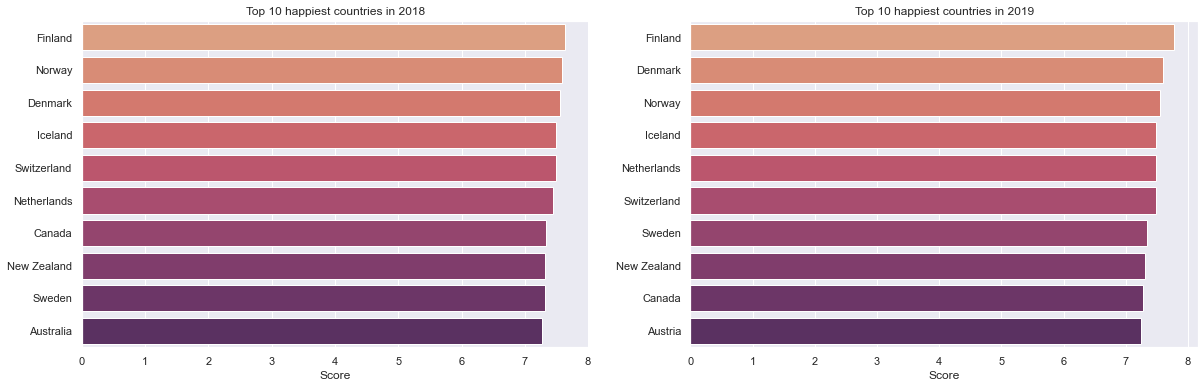

In [70]:
fig, (ax_2018, ax_2019) = plt.subplots(1,2,figsize=(20,6))
sns.barplot(y=top10_happiest_2018['Country or region'], x=top10_happiest_2018['Score'],
           palette='flare', ax=ax_2018)
ax_2018.set(title ='Top 10 happiest countries in 2018',ylabel='')
sns.barplot(y=top10_happiest_2019['Country or region'], x=top10_happiest_2019['Score'],
           palette='flare', ax=ax_2019)
ax_2019.set(title ='Top 10 happiest countries in 2019',ylabel='')

* Finland is always the happiest country in 2018 and 2019
* Norway was the second happiest country in 2018 but in 2019 Denmark took its place
* Overall, for both years, we still have the same list of countries with a small change in order

[Text(0.5, 1.0, 'Top 10 saddest countries in 2019'), Text(0, 0.5, '')]

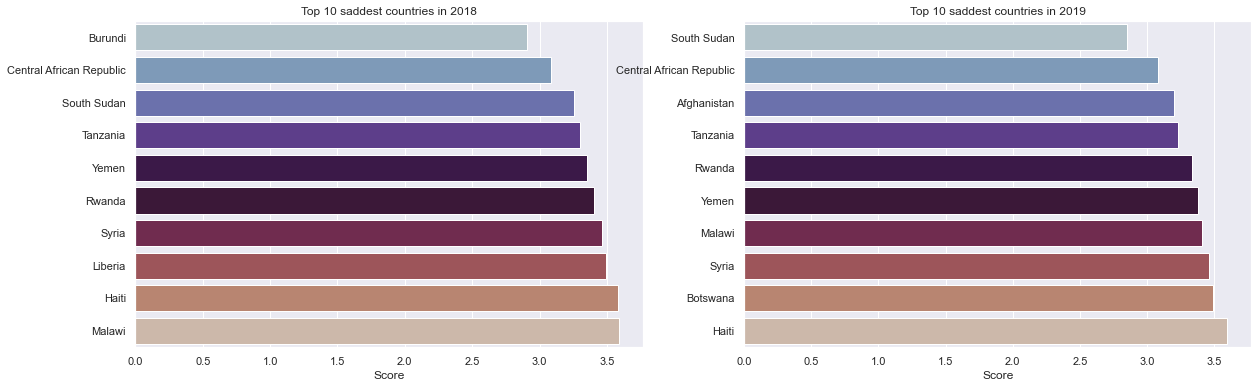

In [19]:
fig, (ax_2018, ax_2019) = plt.subplots(1,2,figsize=(20,6))
sns.barplot(y=top10_saddest_2018['Country or region'], x=top10_saddest_2018['Score'],
           palette='twilight', ax=ax_2018)
ax_2018.set(title ='Top 10 saddest countries in 2018',ylabel='')
sns.barplot(y=top10_saddest_2019['Country or region'], x=top10_saddest_2019['Score'],
           palette='twilight', ax=ax_2019)
ax_2019.set(title ='Top 10 saddest countries in 2019',ylabel='')

* In 2018, Burundi was the saddest country but in 2019 it is no longer in the list of the top 10 saddest countries
* South Sudan became the saddest country in 2019
* Overall, for both years, we still have the same list of countries with a small change in order

### Correaltions in 2018

In [20]:
corr = data_2018.corr()
corr

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.369107
Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.403234
GDP per capita,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.309626
Social support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.216877
Healthy life expectancy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.315481
Freedom to make life choices,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.460788
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.362246
Perceptions of corruption,-0.369107,0.403234,0.309626,0.216877,0.315481,0.460788,0.362246,1.000000


Text(0.5, 1.0, 'Correlation Heat Map for World Happiness 2018')

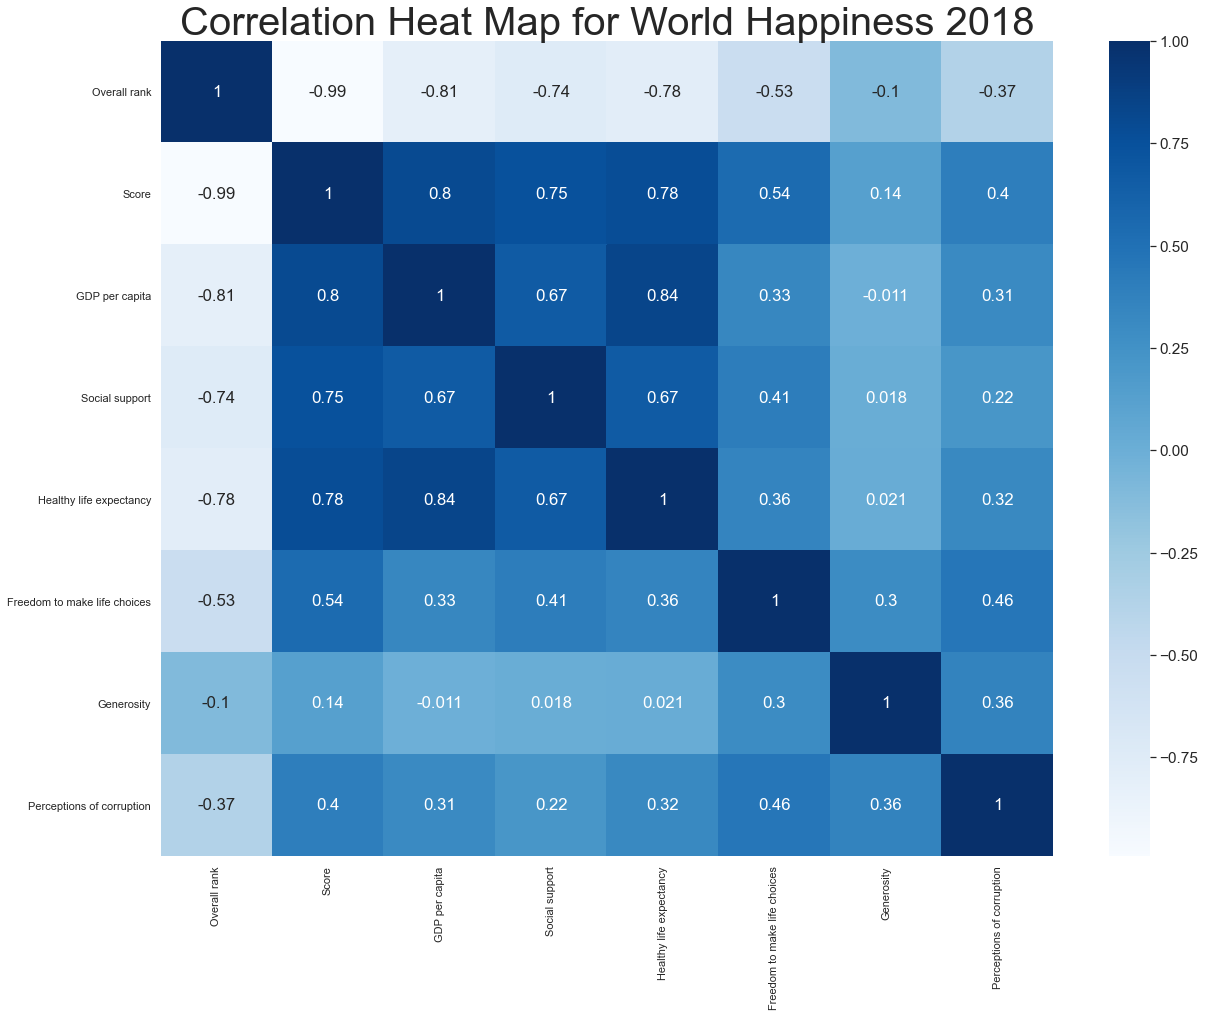

In [21]:
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True, ax=ax, cmap="Blues")
ax.set_title('Correlation Heat Map for World Happiness 2018', fontsize=40)

* We can see that there are strong positive correlations between Score and GDP per Capita, Score and Social support, and Score and Healthy life expectancy

### Top 10 countries with highest GDP per Capita in 2018

In [22]:
top10_GDP_2018 = data_2018.groupby('Country or region')['GDP per capita'].max().sort_values(ascending=False).reset_index().head(10)
top10_GDP_2018

,Country or region,GDP per capita
0,United Arab Emirates,2.096
1,Qatar,1.649
2,Luxembourg,1.576
3,Singapore,1.529
4,Kuwait,1.474
5,Norway,1.456
6,Ireland,1.448
7,Switzerland,1.420
8,Hong Kong,1.405
9,United States,1.398


* The country with the highest GDP per capita is United Arab Emirates
* From the list of the top 10 happiest countries in 2018 we find : Norway in the 5th rank and Switzerland in the 7th rank, this may prove that a strong economy is not the answer to happiness

### Top 10 countries with highest Social support in 2018

In [23]:
top10_Social_2018 = data_2018.groupby('Country or region')['Social support'].max().sort_values(ascending=False).reset_index().head(10)
top10_Social_2018

,Country or region,Social support
0,Iceland,1.644
1,New Zealand,1.601
2,Finland,1.592
3,Denmark,1.590
4,Uzbekistan,1.584
5,Ireland,1.583
6,Norway,1.582
7,Australia,1.573
8,Israel,1.559
9,Switzerland,1.549


* The country with the highest Social support is Iceland
* The top 3 happiest countries in 2018 (Iceland, Finland, and Denmark) are in the top 4 countries with highest Social support, this supports the idea that Social support is key to creating a happier country

### Score and Healthy life expectancy

Text(0, 0.5, 'Healthy Life Expectancy')

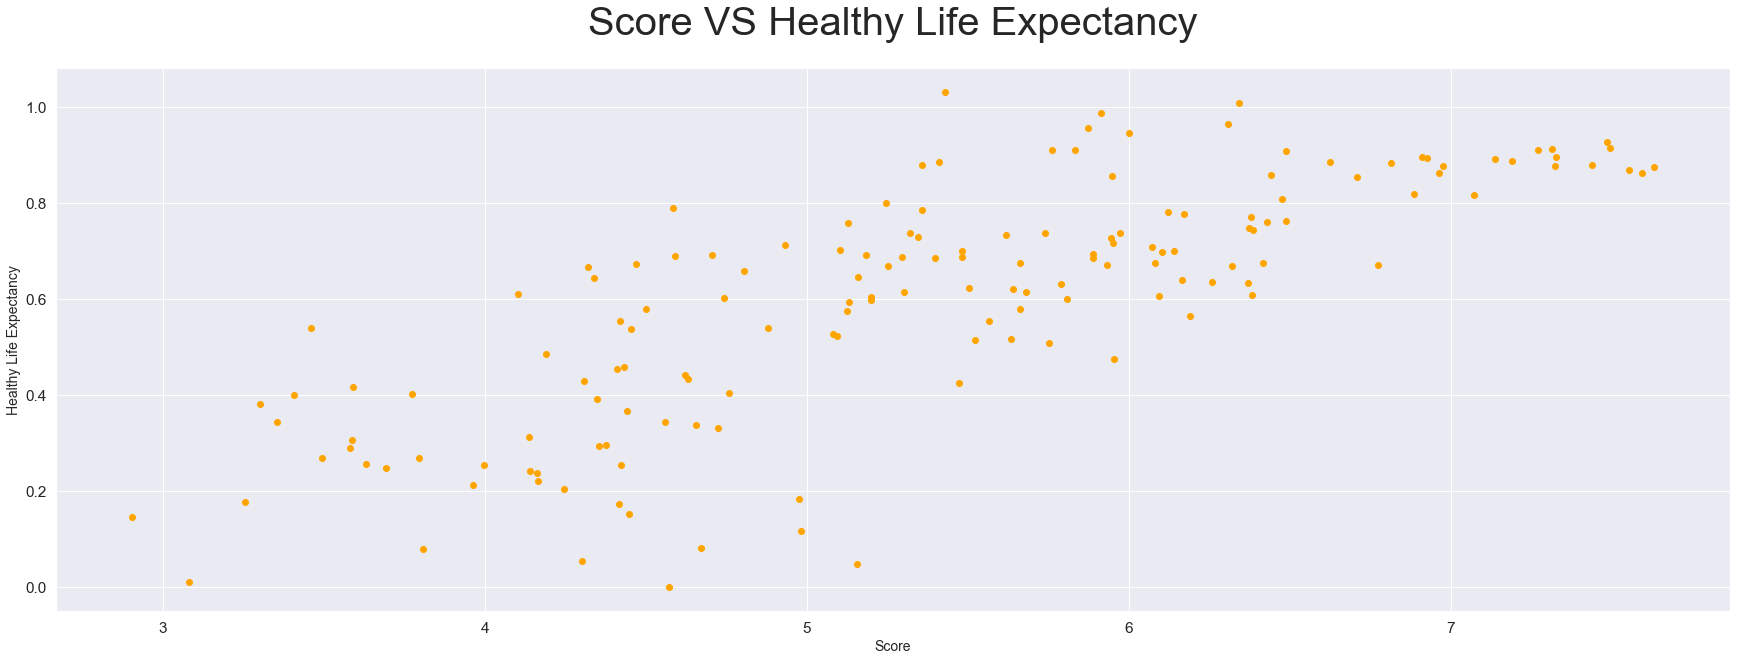

In [24]:
plt.figure( figsize=(30,10))
plt.scatter(data_2018['Score'], data_2018['Healthy life expectancy'], color='orange')
plt.title('Score VS Healthy Life Expectancy', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Healthy Life Expectancy', fontsize=14)

* The graph representing the correlation between happiness score and healthy life expectancy displays a stronger correlation with the higher scores. However, it does seem that the curve flattens as you reach a healthy life expectancy score of 0.8, showing that beyond this point of life, happiness stays the same.

### Hypothesis Testing

In [25]:
data_2018['GDP per capita'].mean()

0.8914487179487179

In [26]:
top20_GDP_2018 = data_2018.groupby('Country or region')['GDP per capita'].max().sort_values(ascending=False).reset_index().head(20)
top20_GDP_2018['GDP per capita'].mean()

1.4482

**Student's t-distribution**

When the sample size N is small (let's say less than 30 is small) , we must draw our test statistic from a t-distribution. The shape of this distribution narrows and becomes more normal like when the sample size increases or degrees of freedom increases, where degrees of freedom is N-1.

* If we have one sample that we want to compare to some specified value, we must do a **one-sample t-test**.
* If we have two independent samples that we want to compare to each other, we must do an **independent samples t-test**.
* If we have two dependent samples taken from the same individuals or objects, we must do a **paired samples t-test**.

#### 1st hypothesis testing:
A sample of the top 20 happiest countries in 2018 yields a 'GDP per capita' sample mean of sample_mean = 1.4482 . **Can we consider the chosen sample as a representative sample of the population of 2018?** (population_mean = data_2018['GDP per capita'].mean() = 0.89). To test this question we will use what is refered to as a one-sample t-test.

First we state **the null hypothesis and alternative hypothesis** like this;

* H0: The chosen sample is a representative sample of the population of 2018, sample_mean = population_mean.
* HA: The chosen sample is not a representative sample of the population of 2018, sample_mean != (not equal) population mean

Then, we specify **a significance (alpha) level**. Usually, statistical significance is associated with an alpha level of α = 0.05 or smaller. Next, we use a T-distribution table (we find this table in the internet) to look up **the critical t-value that corresponds to this α level (also to the confidence interval)**. Here we are doing a two-tailed test because we don't care if the sample mean is greater than or less than the population mean. We just are testing to see if the two are equal or not. 

Next we calculate **the t-statistic** for the sample mean compared to the population mean dividing by the standard deviation of the sample mean, which is the standard error σ/sqrt(N). 

**If this t-statistic is less (lower) than t-critical then we accept the null hypothesis, otherwise we reject the null and accept the alternative hypothesis.**

T-table information:

* degrees of freedom: df = N-1
* t-critical for specified alpha level: t* = 2.093
* t-statistic: t = (sample_mean - population_mean)/(s/sqrt(N)) where s is the sample standard deviation.

In [27]:
population_mean = data_2018['GDP per capita'].mean()
sample_mean = top20_GDP_2018['GDP per capita'].mean()
t_critical = 2.093
sample_std = top20_GDP_2018['GDP per capita'].std()
N= 20
se = sample_std / np.sqrt(N)
t_statistic = (sample_mean - population_mean) / se
print('The T_statistic is', t_statistic)

The T_statistic is 14.198243987333385


In [31]:
# a one sample t-test that gives us the p-value too can be done with scipy as follows:
t, p = py.stats.ttest_1samp(top20_GDP_2018['GDP per capita'], population_mean)
print ('T_statistic is', t, '\nP-value is', p)

T_statistic is 14.198243987333381 
P-value is 1.4406928598955886e-11


* T_statistic is greater than T_critical in magnitude, so there is a statistically significant difference at the alpha = 0.05 level between the sample mean and the population mean. So we reject the null hypothesis in favor of the alternative.

#### 2nd hypothesis testing
**Does the generosity increase from 2018 to 2019?**
* H0: It does not increase, sample_mean (generosity_mean_2019) = population_mean (generosity_mean_2018) .
* HA: It increases, sample_mean != (not equal) population mean

We will use α = 0.05 and since the sample size is large (more than 30) we will do a z-statistic test this time. The z-critical associated to the chosen alpha is z-critical =  1.65 (from the z-distribution table)

z-statistic: z = (sample_mean - population_mean)/(s/sqrt(N)) where s is the sample standard deviation.

In [43]:
population_mean_generosity = data_2018['Generosity'].mean()
population_mean_generosity

0.18100641025641023

In [42]:
sample_mean_generosity = data_2019['Generosity'].mean()
sample_mean_generosity

0.18484615384615383

In [45]:
population_mean = data_2018['Generosity'].mean()
sample_mean = data_2019['Generosity'].mean()
z_critical = 1.65
sample_std = data_2019['Generosity'].std()
N= len(data_2019['Generosity'])
se = sample_std / np.sqrt(N)
z_statistic = (sample_mean - population_mean) / se
print('The z_statistic is', z_statistic)

The z_statistic is 0.5034766023320614


* The z-statistic is less than z-critical then we accept the null hypothesis. The generosity does not increase from in 2019.

####  3rd hypothesis testing

Previously we have said that the list of the top 10 happiest countries in 2019 is almost the same as the list of 2018. Now **we want to know if those 10 countries were happier in 2019 than in 2018?** To answer this question we will use the mean of the 'Social support' as we have already found that the 'Social support' is key to creating a happier country. So;
* sample1 = the top 10 happiest countries in 2018
* sample2 = the top 10 happiest countries in 2019
* H0: The Social support mean is the same for both years (x̄1 = x̄2)
* H1: The social support mean is greater in 2019 (x̄2 > x̄1) 
* alpha = 0.05
We are going to compare two independent samples (with small sizes), therefore we will do an independent samples t-test.

T-table information:

* degrees of freedom: df = N-1 = 10 - 1 = 9
* T-critical for specified alpha level: t* = 1.833 (one-tailed, right-side)

In [49]:
sample1 = top10_happiest_2018['Social support']
sample2 = top10_happiest_2019['Social support']
# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t_statistic, p_twosided = py.stats.ttest_ind(sample2, sample1, equal_var=True)
print("t_statistic = ",t_statistic, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t_statistic =  -0.9947190060594734 , p_twosided =  0.33305781483110997 , p_onesided = 0.16652890741555498


* T-statistic is lower than T-critical in magnitude which means we have to accept the null hypothesis.  Statistically, we say the sample1 mean is no different than the sample2 mean.